# **PROJECT: DATA WRANGLING**

### INTRODUCTION

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

## **PROJECT MOTIVATION**

**Context**

Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

**Data**

In this project, you will work on the following three datasets.
* Enhanced Twitter Archive
* Additional Data via the Twitter API
* Image Predictions File





Data wrangling consist of three steps: data gathering, data assessing and data cleaning.
We now start our data wrangling process with the first step: data gathering.

**STEP 1:  Data Gathering**
To gather the three datasets to be used in this project, the following steps will be followed:
* Download and upload the *twitter_archive_enhanced.csv* and read it into a pandas dataframe.
* Download the *image_prediction.tsv* from the provided this url: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv using the `requests` library in python.
* Query the tweet's retweet count
 and favorite("like") count using the `tweapy`library and store the data in *tweet_json.txt*.
* Read the *tweet_json.txt* line by line into a pandas dataframe with **tweetID, retweet count, and favorite count**.


### Load Enhanced Twitter archive dataset(First Dataset)



In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import requests as re
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
#Set the display rows and width
pd.set_option("display.max_rows", 2500)
pd.set_option('display.width', 1000)
pd.set_option("display.max_colwidth", 1)

In [2]:
# Load the twitter archive enhanced dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Download and load the image prediction data using the request library(Second dataset)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

image_prediction = pd.read_csv(url, sep = '\t')

### Read the tweet_json.txt file queried from using the Twitter API(Third Dataset)


In [4]:
Tweet_json_data  = pd.read_json("tweet_json.txt", lines=True)

In [5]:
# Read the tweet API dataset line by line and into a pandas dataframe with tweetID, retweet count, and favorite count
twitter_api = []
with open("tweet_json.txt", "r") as file:
  for line in file:
    tweet = json.loads(line)
    tweet_id = tweet['id']
    retweet_count = tweet['retweet_count']
    favorite_count = tweet['favorite_count']

    twitter_api.append({'tweet_id': tweet_id,'retweet_count': retweet_count, 'favorite_count': favorite_count})

In [6]:
# We now read the json file into a pandas dataframe
twitter_api = pd.DataFrame(twitter_api)

We now want to assess our three dataset visually and programmatically to identify data quality and tidiness issues

## STEP 2: Data Assessing


***Visual and Programmatic Assessment***

**Twitter archive enhanced dataset**

In [7]:
# assess the first five rows of the dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
# Check the shape of the data
twitter_archive.shape

(2356, 17)

The dataset contains 2356 rows and 17 columns

In [9]:
# Check for data types and some info about the data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Checking for the total null values in each column
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
# check for duplicates
twitter_archive.duplicated().sum()

0

In [12]:
# Check for some stats about the numerical columns
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#check for the values in the source column
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Image Prediction Dataset**

In [14]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
image_prediction.duplicated().sum()

0

**Twitter API data**

In [19]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [20]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
twitter_api.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [22]:
twitter_api.duplicated().sum()

0

## Data Assessment Summary

### <ins>Quality Issues</ins>

**twitter Archive Dataset**
1. drop coulumns not needed for data analysis and keep only tweets column
2. Missing values(URL) in expanded urls
3. Datatype of timestamp in string
4. Tweet id datatype in int
5. text column includes texts and links
6. extract tweet's link from the text column
7. extract the source from the source's column
8. values in the rating_denominator has values different from 10 and multiples of 10


**Image Prediction dataset**
1. column names are not descriptive
2. data type of tweeet_id is in integers

**Twitter API dataset**
1. datatype of tweet_id is in integers


### <ins>Tidiness Issues</ins>

1. The four dog stages should be melted into one column with column name say, dog_stage
2. All the tables should be joined on tweet_id

## Step 3: Data Cleaning

In this section, we will clean all the issues identified during the asssessing step

In [23]:
# First, we make a copy of each of the dataframe
archive_copy = twitter_archive.copy()
image_copy = image_prediction.copy()
twitter_copy = twitter_api.copy()

**Define**

We need to drop all columns that have null value more than 70%



**Code**


In [24]:
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [25]:
archive_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [26]:
print(twitter_archive.shape)
print(archive_copy.shape)

(2356, 17)
(2356, 17)


In [27]:
columns_drop = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id',
                'retweeted_status_user_id','retweeted_status_timestamp']
for x in columns_drop:
    archive_copy = archive_copy[archive_copy[x].isnull()]
    archive_copy = archive_copy.drop([x], axis = 1)

**Test**

In [28]:

archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [29]:
archive_copy.shape

(2097, 12)

**Define**

- Change data type of tweet_id in all three dataframes
- change the data type of timestamp to datetime in archive_copy
- create a single column for dog stages


**Code**

In [30]:
# Change data type of tweet_id in all three dataframes
data_list = [archive_copy, image_copy, twitter_copy]

for col in data_list:
    col.tweet_id = col.tweet_id.astype(str)

In [31]:
# Change the timestamp data type to dateTime
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [32]:
# Create a list of the dog stages and the loop through the list to None with a space in those columns

stages = ['doggo', 'floofer', 'pupper', 'puppo']

for x in stages:
    archive_copy[x] = archive_copy[x].replace('None', '')
    

In [33]:
#  Create a single column for all the dog stages
archive_copy['dog_stage'] = archive_copy['doggo'] + archive_copy['floofer'] + archive_copy['pupper'] + archive_copy['puppo']

In [34]:
archive_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,


In [35]:
#check the new dog stage values

archive_copy['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [36]:
# Let us now seperate the combined values as seen above

archive_copy['dog_stage'].replace({'doggopupper': 'doggo pupper','doggofloofer':'doggo floofer', 
                                   'doggopuppo':'doggo puppo', '': None}, inplace=True)

In [37]:
archive_copy['dog_stage'].value_counts()

pupper           221
doggo             72
puppo             23
doggo pupper       9
floofer            9
doggo puppo        1
doggo floofer      1
Name: dog_stage, dtype: int64

In [38]:
# We now drop all the four dog stage columns since we have created a new column for it.
archive_copy.drop(['doggo','floofer', 'pupper', 'puppo'], axis= 1, inplace =True)

In [39]:
archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [40]:
archive_copy['name'].replace({'a':'NaN', 'None': 'NaN', 'Nan':'NaN'}, inplace = True)

**Test**

In [41]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 163.8+ KB


In [42]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [43]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


**Define**
- Extract the tweet's link from the text in the archived dataset


**Code**

In [44]:
# create a new column and use regular expression to extract tweet's link from the text

archive_copy['tweet_link'] = archive_copy['text'].str.extract("(https://t.co/[a-zA-Z0-9-]+)", expand = True)

**Test**

In [45]:
archive_copy['tweet_link'].sample(3)

977    https://t.co/D17IAcetmM
46     https://t.co/rf661IFEYP
711    https://t.co/p6fgYe2dB6
Name: tweet_link, dtype: object

**Define**
- Extract real dog names a from text and remove a,an,just,etc, in the archive dataset

**Code**

In [46]:
#check the sample of text to find patttern to extract the name

archive_copy['text'].sample(10)

2051    This is Julius. He's a cool dog. Carries seash...
199     Sometimes you guys remind me just how impactfu...
480     This is Akumi. It's his birthday. He received ...
1148    This is Blitz. He's a new dad struggling to co...
1409    This is Yukon. He pukes rainbows. 12/10 magica...
1305    Meet Clarkus. He's a Skinny Eastern Worcesters...
1140    This is Cilantro. She's a Fellation Gadzooks. ...
1217    Just in case anyone's having a bad day. 12/10 ...
1017    This is a carrot. We only rate dogs. Please on...
83      I can say with the pupmost confidence that the...
Name: text, dtype: object

In [47]:
# Extract dog name from text
archive_copy['dog_name'] = archive_copy.text.str.extract(
    "((?<= named )[A-Z][a-z]+| (?<= [i,']s )[A-Z][a-z]+| (?<=[M,m]eet )[A-Z][a-z]+| (?<= to )[A-Z][a-z]+)", expand = True)

**Test**

In [48]:
archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_link,dog_name
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://t.co/MgUWQ76dJU,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://t.co/0Xxu71qeIV,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://t.co/wUnZnhtVJB,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://t.co/tD36da7qLQ,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://t.co/AtUZn91f7f,Franklin


In [49]:
#Lets drop the name column

archive_copy = archive_copy.drop(['name'], axis=1)

In [50]:
archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_stage', 'tweet_link',
       'dog_name'],
      dtype='object')

**Define**
- use regular expressions to extract the source from the source column in the archive dataset

**Code**

In [51]:
archive_copy['source'] = archive_copy['source'].str.extract(r"(?<=>)(.*)(?=<)")

**Test**

In [52]:
# check the new values of the source

archive_copy['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

**Define**
- include only tweets with images and remove all NaN values if expanded_url in the archive dataset

**Code**

In [53]:
archive_copy = archive_copy[archive_copy['expanded_urls'].notna()]

**Test**

In [54]:
archive_copy['expanded_urls'].isnull().sum()

0

In [55]:
image_copy.shape

(2075, 12)

**Define**
- The dataframes should be merged on tweet_id since single oberservations is stored in different tables

**Code**

In [56]:
# Merge archive data and image data on tweet_id

merge_1 = pd.merge(archive_copy, image_copy, how='left', on = 'tweet_id' )

In [57]:
# Merge merge_1 and twitter api data on tweet_id

twitter_data = pd.merge(merge_1, twitter_copy, how= 'left', on = 'tweet_id')

In [58]:

twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   dog_stage           335 non-null    object             
 8   tweet_link          2094 non-null   object             
 9   dog_name            1423 non-null   object             
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   float64            
 12  p1                  1971 non-null 

## Step 4: Store the data

In [59]:
# Store the dataframe to .csv file
twitter_data.to_csv('twitter_archive_master.csv', index = False)

In [60]:
# Read the dataframe from the .csv file

df = pd.read_csv('twitter_archive_master.csv')

In [61]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,tweet_link,dog_name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,https://t.co/MgUWQ76dJU,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://t.co/0Xxu71qeIV,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,https://t.co/wUnZnhtVJB,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,https://t.co/tD36da7qLQ,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,https://t.co/AtUZn91f7f,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2094 non-null   int64  
 1   timestamp           2094 non-null   object 
 2   source              2094 non-null   object 
 3   text                2094 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2094 non-null   int64  
 6   rating_denominator  2094 non-null   int64  
 7   dog_stage           335 non-null    object 
 8   tweet_link          2094 non-null   object 
 9   dog_name            1423 non-null   object 
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_con

In [63]:
# Change the timestamp datatype to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   dog_stage           335 non-null    object             
 8   tweet_link          2094 non-null   object             
 9   dog_name            1423 non-null   object             
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   float64            
 12  p1                  1971 non-null 

# Data Analysis and Visualizations

In [65]:
# Analyze the numerical features

df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.094000e+03,2094.000000,2094.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,2094.000000,2094.000000
mean,7.365113e+17,12.191500,10.449379,1.201928,0.594558,1.345850e-01,6.016556e-02,2844.039160,8987.330468
std,6.710561e+16,40.393858,6.649800,0.559020,0.272126,1.010527e-01,5.094156e-02,4712.115669,12207.002968
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.768137e+17,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,644.500000,2045.250000
50%,7.097095e+17,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,1404.000000,4195.500000
75%,7.876377e+17,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,3289.500000,11443.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [66]:
df['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [68]:
df['dog_stage'].value_counts()

pupper           220
doggo             72
puppo             23
doggo pupper       9
floofer            9
doggo puppo        1
doggo floofer      1
Name: dog_stage, dtype: int64

In [69]:
df['dog_name'].value_counts()

 Charlie         11
 Lucy            11
 Oliver          11
 Cooper          10
 Tucker           9
                 ..
 Colin            1
 Marq             1
 Alexanderson     1
 Klein            1
 Raphael          1
Name: dog_name, Length: 957, dtype: int64

## Insights

1.  Some dogs have 0/10 rating

2.  Most tweets have just one image

3.  From the source column, most tweet came from tweetter iphone.

4.  Most tweeted dogs were on the pupper stage

## Visualizations

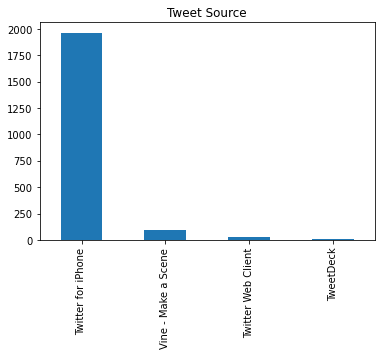

In [73]:
df['source'].value_counts().plot(kind='bar', title ='Tweet Source');

- The above figure shows that twitter for iphone is the most used app;ication for twitter user of WeRateDogs

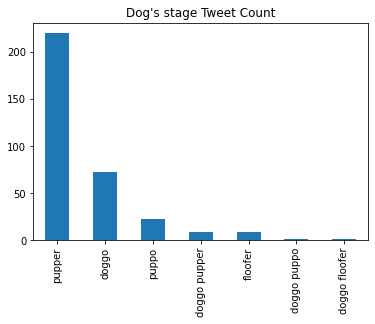

In [75]:
df['dog_stage'].value_counts().plot(kind='bar', title ='Dog\'s stage Tweet Count');

- This shows that the pupper is the most tweeted dog_stage for twitter users of WeRateDogs

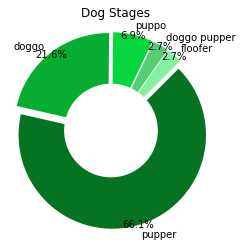

In [100]:
#Draw a pie chart for top 5 dog stages

#colors
colors = ['#057322','#07ad33','#06d63e','#56cc75', '#86f0a2']
#explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

#Top 5 dog stages
stages_pie = df['dog_stage'].value_counts()[:5]

plt.pie(stages_pie, colors = colors, labels=stages_pie.index, autopct='%1.1f%%', startangle=45,
         pctdistance=0.99, explode = explode, counterclock = False, labeldistance=1.1)
plt.axis('square');

#Draw circle
centre_circle = plt.Circle((0,0),0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Figure title
plt.title('Dog Stages');
plt.show()

- Pupper and doggo stages are the most tweeted dog_stages.
- Multi-stages dogs have very little percentage of tweets

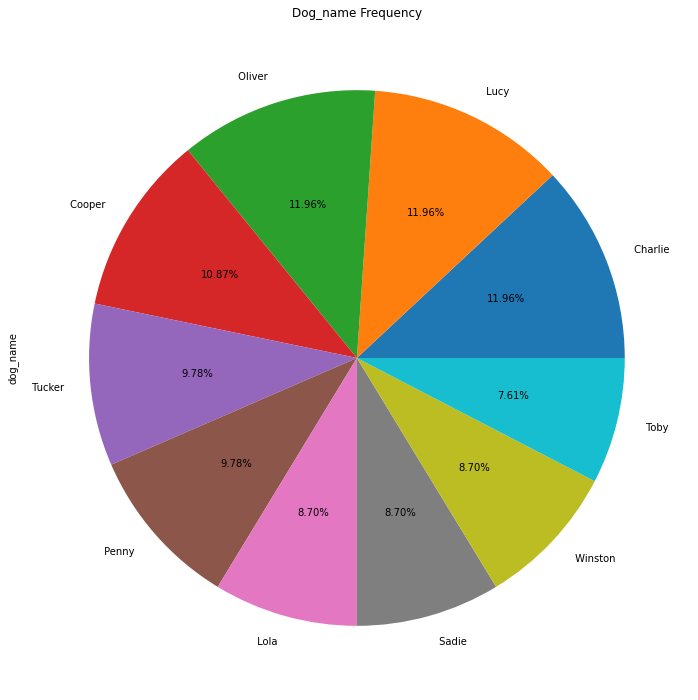

In [103]:
plt.figure(figsize =(12,18))
dog_names = df['dog_name'].value_counts().nlargest(10).plot(kind='pie', autopct ='%1.2f%%');
dog_names.set_title('Dog_name Frequency');

- From the figure we can see that charlie, Lucy, and Oliver are the mostly  used dog names